In [1]:
import numpy as np

In [2]:
x_values = np.linspace(1, 9, 1000000)
x_values[:10], x_values[-10:]

(array([1.      , 1.000008, 1.000016, 1.000024, 1.000032, 1.00004 ,
        1.000048, 1.000056, 1.000064, 1.000072]),
 array([8.999928, 8.999936, 8.999944, 8.999952, 8.99996 , 8.999968,
        8.999976, 8.999984, 8.999992, 9.      ]))

In [3]:
def phi(x, alpha):
    if abs(x - 5) - alpha < 0:
        pred = 2
    else:
        pred = 1
    return pred

In [4]:
def p_x_given_c1(x):
    return 1 / 8

def p_x_given_c2(x):
#     assert(x >= 2 and x <= 8)
    if (x < 2 or x > 8):
        return 0
    if (x < 5):
        return (1 / 9) * (x - 2)
    else:
        return (1 / 9) * (8 - x)

In [5]:
def p_c2_given_x(x):
    return p_x_given_c2(x) / (p_x_given_c1(x) + p_x_given_c2(x))

def p_c1_given_x(x):
    return (p_x_given_c1(x)) / (p_x_given_c1(x) + p_x_given_c2(x))

In [6]:
def p_x(x):
    priors = 0.5
    return priors * (p_x_given_c1(x) + p_x_given_c2(x))

In [7]:
probabilities = [p_x(x) for x in x_values]
probabilities /= np.sum(probabilities)
probabilities[:10], probabilities[len(probabilities) // 2 : len(probabilities) // 2 + 10]

(array([5.0000025e-07, 5.0000025e-07, 5.0000025e-07, 5.0000025e-07,
        5.0000025e-07, 5.0000025e-07, 5.0000025e-07, 5.0000025e-07,
        5.0000025e-07, 5.0000025e-07]),
 array([1.83333247e-06, 1.83332892e-06, 1.83332536e-06, 1.83332181e-06,
        1.83331825e-06, 1.83331469e-06, 1.83331114e-06, 1.83330758e-06,
        1.83330403e-06, 1.83330047e-06]))

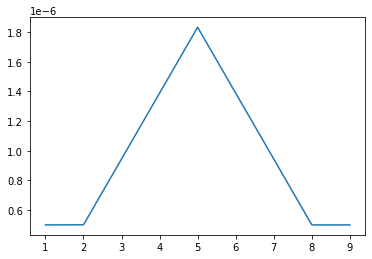

In [8]:
import matplotlib.pyplot as plt

plt.plot(x_values, probabilities)

In [34]:
alpha = 1.875
num_trials = 100000

p_missclassified = np.zeros((num_trials, 1))

for i in range(num_trials):

    x = np.random.choice(x_values, p=probabilities)
    
    # impossible to missclassify if x < 2 or x > 8
    if x < 2 or x > 8:
        p_missclassified[i] = 0
        continue
        
    # classify based on phi
    pred = phi(x, alpha)

    # if phi predicts 1, then the probability we guessed wrong is P(C2|x)
    if (pred == 1):
        p_missclassified[i] = p_c2_given_x(x)
    # if phi predicts 2, then the probability we guessed wrong is P(C1|x)
    else:
        p_missclassified[i] = p_c1_given_x(x)
print(np.mean(p_missclassified))

0.30462425850155433
